**Importing the required libraries**

In [168]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.text import Text
from nltk.collocations import *
from textblob import TextBlob
from collections import Counter
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import numpy as np 
from sklearn.linear_model import LogisticRegression


In [169]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Importing the dataset**

In [170]:
df = pd.read_csv('/content/sample_data/project_Reviews.csv')
df.head() # head() will display the top 5 row in dataset

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B000FFQ1VW,AKXCQP3DLGW7F,"A. bauman ""Mother, Wife, Artist""",6,6,4,1152230400,For a gluten free bread,This was a keeper. The best I have found so f...
1,2,B000NZVYF2,A3MLKLD10JSZG9,momtothree,0,0,5,1332806400,Aroma is wonderful,The aroma is wonderful. It came in a large pl...
2,3,B000NMJWZO,A1CIW5T9HTSODP,Shirley June,0,0,5,1305849600,Pamela's Pancake & Baking Mix is the best!,I enjoy using Pamela's Pancake & Baking Mix be...
3,4,B0009TMZIM,A3LWIP2I6550TB,X. Nguyen,3,3,5,1297814400,Nice tea set,Purchased these as a gift. I was told by the ...
4,5,B0017U9VO8,A2912BA68NPCYG,Marly,1,1,5,1265414400,My favorite gluten free food bar,I am gluten intolerant and this bar suits my n...


**Displays the datatypes**

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      20000 non-null  int64 
 1   ProductId               20000 non-null  object
 2   UserId                  20000 non-null  object
 3   ProfileName             20000 non-null  object
 4   HelpfulnessNumerator    20000 non-null  int64 
 5   HelpfulnessDenominator  20000 non-null  int64 
 6   Score                   20000 non-null  int64 
 7   Time                    20000 non-null  int64 
 8   Summary                 20000 non-null  object
 9   Text                    20000 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.5+ MB


**Meta Data**

**Data set name** : Amazon Fine Food Reviews

**Id** : 
Row Id

**UserId** :
Unqiue identifier for the user

**ProfileName** :
Profile name of the user

**HelpfulnessNumerator** :
Number of users who found the review helpful

**HelpfulnessDenominator** :
Number of users who indicated whether they found the review helpful or not

**Score** :
Rating between 1 and 5

**Time** :
Timestamp for the review

**Summary** :
Brief summary of the review

**Text** :
Text of the review



**df.isnull().sum()** will displays the count of null values

In [172]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

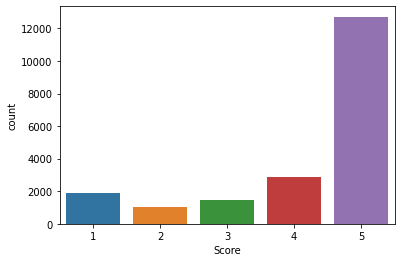

In [173]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="Score", data=df)
plt.show()

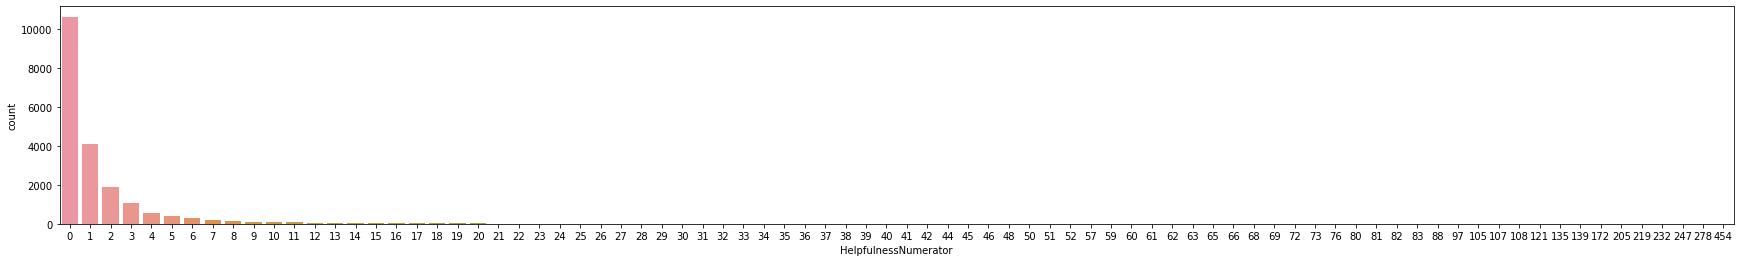

In [174]:
fig_dims = (30, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="HelpfulnessNumerator", data=df)
plt.show()

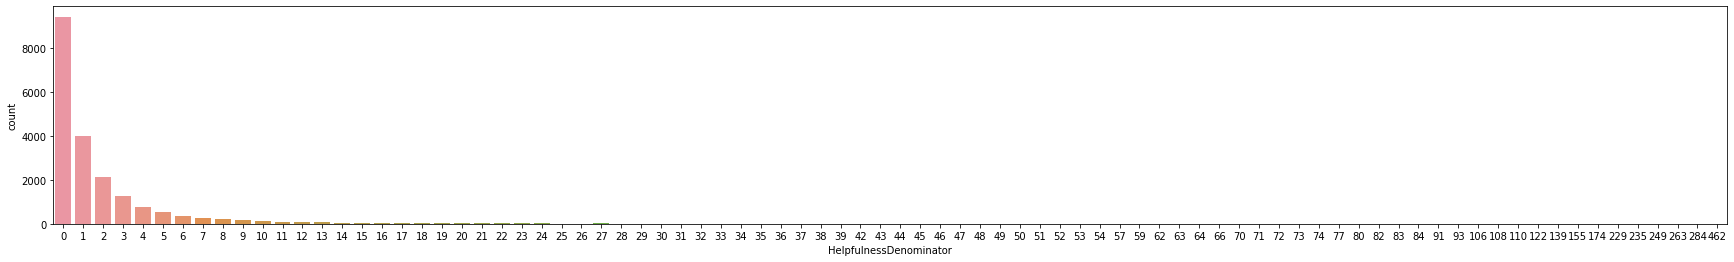

In [175]:
fig_dims = (30, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="HelpfulnessDenominator", data=df)
plt.show()

Text(0.5, 1.05, 'Correlation Matrix')

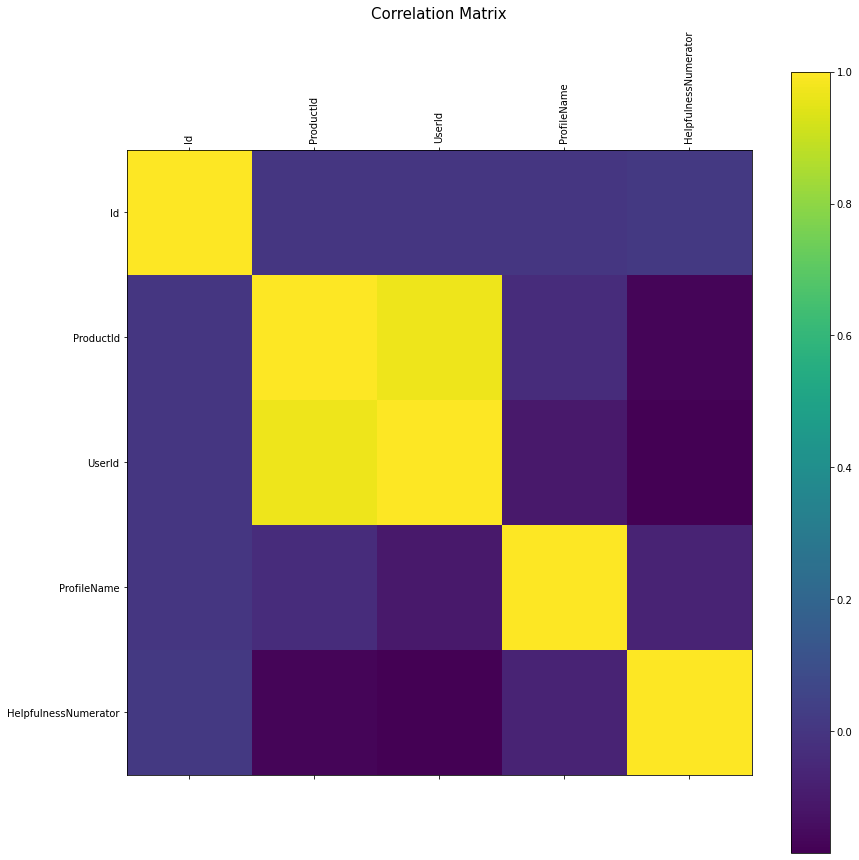

In [176]:
from matplotlib import rcParams
plt.matshow(df.corr())
plt.yticks(range(len(df.corr().columns)), df.columns)
plt.xticks(range(len(df.corr().columns)), df.columns,rotation=90)
plt.colorbar()
plt.title('Correlation Matrix', fontsize=15,pad= 100)


# Data Cleaning

The practise of repairing or deleting inaccurate, corrupted, improperly formatted, duplicate, or incomplete data from a dataset .


**Lower** **casing**

Lower casing step converts the Summary to Lower case.

In [177]:
df['Summary'] = df['Summary'].str.lower()
df['Summary']

0                                  for a gluten free bread
1                                       aroma is wonderful
2               pamela's pancake & baking mix is the best!
3                                             nice tea set
4                         my favorite gluten free food bar
                               ...                        
19995              wrong items sent  poor customer service
19996    filler food is empty, leaves your cat always n...
19997                                                great
19998                        bad experience...dissapointed
19999                                 product as described
Name: Summary, Length: 20000, dtype: object

**Punctuation removal**

The Punctuation step is used to remove all the punctuation from the Summary.

In [178]:
df['Summary'] = df['Summary'].str.replace(r'[^\w\s]+', '')
df['Summary']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0                                  for a gluten free bread
1                                       aroma is wonderful
2                  pamelas pancake  baking mix is the best
3                                             nice tea set
4                         my favorite gluten free food bar
                               ...                        
19995              wrong items sent  poor customer service
19996    filler food is empty leaves your cat always ne...
19997                                                great
19998                           bad experiencedissapointed
19999                                 product as described
Name: Summary, Length: 20000, dtype: object

**Removal** **of** **stop** **words**

In this step stopwords are being removed. Stopwords are common words that are filtered out before processing a natural language

In [179]:
# download the set of stop words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [180]:
# creating list of custom stop words
customStopWords = ['br', 'href']


In [181]:
useless = stopwords.words('english') + customStopWords
print(useless)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [182]:
# removing stop words from Text
df['Summary'] = df['Summary'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (useless)]))
df['Summary']

0                                  gluten free bread
1                                    aroma wonderful
2                    pamelas pancake baking mix best
3                                       nice tea set
4                      favorite gluten free food bar
                            ...                     
19995         wrong items sent poor customer service
19996    filler food empty leaves cat always needing
19997                                          great
19998                     bad experiencedissapointed
19999                              product described
Name: Summary, Length: 20000, dtype: object

**Tokenization**

Tokenization is the process of dividing the original text into tokens, which are words and phrases.

In [183]:
df["Summary"].apply(lambda x: word_tokenize(x))

0                                    [gluten, free, bread]
1                                       [aroma, wonderful]
2                    [pamelas, pancake, baking, mix, best]
3                                         [nice, tea, set]
4                      [favorite, gluten, free, food, bar]
                               ...                        
19995        [wrong, items, sent, poor, customer, service]
19996    [filler, food, empty, leaves, cat, always, nee...
19997                                              [great]
19998                        [bad, experiencedissapointed]
19999                                 [product, described]
Name: Summary, Length: 20000, dtype: object

**DTM**

The fundamental stage in the analysis is to create the document term matrix (DTM). DTM is a matrix that displays the number of times a word (term) appears in Each Summary

In [184]:
from nltk import corpus
corpus= '. '.join(df["Summary"][:15].to_list())

In [185]:
cv = CountVectorizer()

In [186]:
sentences = tokenize.sent_tokenize(corpus)

In [187]:
X = cv.fit(sentences)

In [188]:
X=cv.transform(sentences)

In [189]:
df2=pd.DataFrame(X.toarray(), columns = cv.get_feature_names_out())

In [190]:
df2

,amazon,aroma,baking,bar,bbq,best,bread,chips,coca,cookies,...,pancakes,says,set,taste,tasteless,tea,use,value,whenever,wonderful
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


**Concordance**

Concordance locates the searched word in a text and provides the context in which it appears.

In [191]:
corpus= ". ".join(df["Summary"][:100].to_list())
corpus = word_tokenize(corpus)


In [192]:
mytext = Text(corpus)
mytext

<Text: gluten free bread . aroma wonderful . pamelas...>

In [193]:
mytext.concordance('food')

Displaying 3 of 3 matches:
 nice tea set . favorite gluten free food bar . bbq chips amazon . taste mold 
ick funky flavor . son loved . great food allergy dogs . liked tea shop . hit 
lce de leche manjar excellent . good food fishy . really good convenient aspar


**Bigram**

Bigram analyses are frequently used to determine which two words frequently appear together.

In [194]:
corpus= " ".join(df["Summary"][:100].to_list())
corpus = word_tokenize(corpus)

In [195]:
bigram_measures = nltk.collocations.BigramAssocMeasures()


In [196]:
finder = BigramCollocationFinder.from_words(corpus)
print(finder)

In [197]:
scored = finder.score_ngrams(bigram_measures.raw_freq)
print(scored)


[(('gluten', 'free'), 0.009966777408637873), (('12', 'watch'), 0.0033222591362126247), (('12', 'year'), 0.0033222591362126247), (('16', 'greatest'), 0.0033222591362126247), (('3ounce', 'bags'), 0.0033222591362126247), (('addicted', 'cat'), 0.0033222591362126247), (('additive', 'one'), 0.0033222591362126247), (('allergy', 'dogs'), 0.0033222591362126247), (('alternative', 'delicious'), 0.0033222591362126247), (('amazon', 'taste'), 0.0033222591362126247), (('annie', 'chuns'), 0.0033222591362126247), (('anxiety', 'sleep'), 0.0033222591362126247), (('anyone', 'try'), 0.0033222591362126247), (('aroma', 'wonderful'), 0.0033222591362126247), (('around', 'cant'), 0.0033222591362126247), (('aspartame', 'good'), 0.0033222591362126247), (('awesome', 'yoohoo'), 0.0033222591362126247), (('bad', 'batch'), 0.0033222591362126247), (('bags', 'pack'), 0.0033222591362126247), (('baking', 'mix'), 0.0033222591362126247), (('bar', 'bbq'), 0.0033222591362126247), (('batch', 'stevia'), 0.0033222591362126247), 

In [198]:
sorted(bigram for bigram, score in scored)[:10]

[('12', 'watch'),
 ('12', 'year'),
 ('16', 'greatest'),
 ('3ounce', 'bags'),
 ('addicted', 'cat'),
 ('additive', 'one'),
 ('allergy', 'dogs'),
 ('alternative', 'delicious'),
 ('amazon', 'taste'),
 ('annie', 'chuns')]

**Trigram**

Trigram analyses are frequently used to determine which three words frequently appear together.

In [199]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()

In [200]:
finder = TrigramCollocationFinder.from_words(corpus)
scored = finder.score_ngrams(trigram_measures.raw_freq)
sorted(bigram for bigram, score in scored)[:10]

[('12', 'watch', 'expiration'),
 ('12', 'year', 'old'),
 ('16', 'greatest', 'worst'),
 ('3ounce', 'bags', 'pack'),
 ('addicted', 'cat', 'loves'),
 ('additive', 'one', 'cup'),
 ('allergy', 'dogs', 'liked'),
 ('alternative', 'delicious', 'annie'),
 ('amazon', 'taste', 'mold'),
 ('annie', 'chuns', 'sprouted')]

**Word frequency**

Here we are finding the top 10 frequent words that occur in the Summary.

In [201]:
Counter(" ".join(df['Summary']).split()).most_common(10)

[('great', 2532),
 ('good', 1805),
 ('best', 1200),
 ('love', 956),
 ('coffee', 883),
 ('tea', 782),
 ('product', 667),
 ('delicious', 637),
 ('taste', 628),
 ('flavor', 521)]

**Wordclouds**

to see the most frequently used words in the Summary.

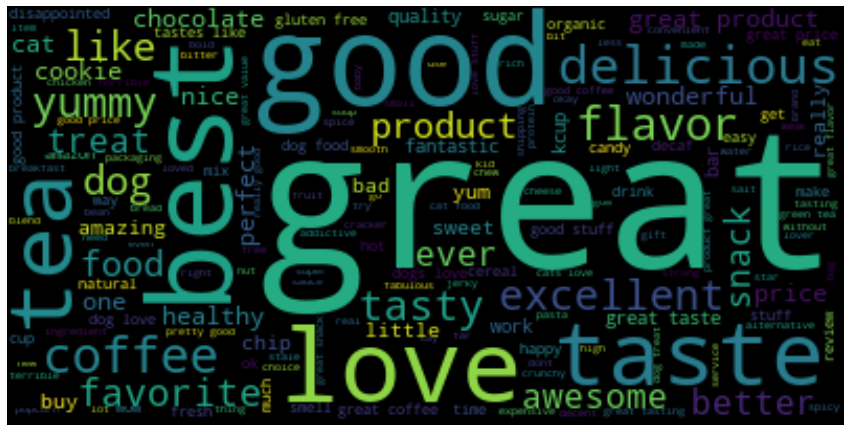

In [202]:

text = " ".join(i for i in df.Summary)
wordcloud = WordCloud(stopwords=useless, background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Sentiment polarity**

A sentiment polarity score is used to understand the sentiment of the Summary. If the sentiment value is nearer to 1 means a positive sentiment, and values nearer to -1 mean a negative sentiment.


In [203]:
df['sentiment'] = df['Summary'].apply(lambda Summary: TextBlob(Summary).sentiment.polarity)
df[['Summary','Score','sentiment']].head(15)

,Summary,Score,sentiment
0,gluten free bread,4,0.40
1,aroma wonderful,5,1.00
2,pamelas pancake baking mix best,5,1.00
3,nice tea set,5,0.60
4,favorite gluten free food bar,5,0.45
5,bbq chips amazon,4,0.00
6,taste mold whenever use,1,0.00
7,nice value dog says taste great,5,0.70
8,mate de coca,5,0.00
9,makes best pancakes,5,1.00


In [204]:
df['sentiment_polarity'] = np.where(df['sentiment'] > 0, 1, -1)

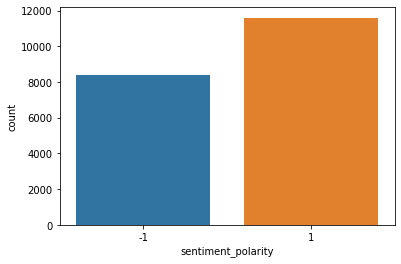

In [205]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='sentiment_polarity', data=df)
plt.show()

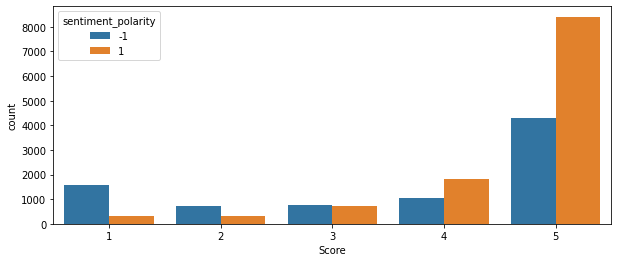

In [206]:
fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(hue='sentiment_polarity',x= 'Score', data=df)
plt.show()

# Logistic Regression

In [207]:
dflr = df[['Summary','sentiment','sentiment_polarity']]
dflr.head()

,Summary,sentiment,sentiment_polarity
0,gluten free bread,0.40,1
1,aroma wonderful,1.00,1
2,pamelas pancake baking mix best,1.00,1
3,nice tea set,0.60,1
4,favorite gluten free food bar,0.45,1


**Split train and test data**

In [208]:

index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

**Count vectorizer:**

In [209]:

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Summary'])
test_matrix = vectorizer.transform(test['Summary'])

**Split target and independent variables**

In [210]:
x_train = train_matrix
x_test = test_matrix
y_train = train['sentiment_polarity'].astype('int')
y_test = test['sentiment_polarity'].astype('int')

**Logistic Regression**

In [211]:
lr = LogisticRegression()


In [212]:
lr.fit(x_train,y_train)

LogisticRegression()

In [213]:
predictions = lr.predict(x_test)

** Precision, Recall , Accuracy**

In [214]:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[1802,  101],
       [  27, 2392]])

In [215]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.99      0.95      0.97      1903
           1       0.96      0.99      0.97      2419

    accuracy                           0.97      4322
   macro avg       0.97      0.97      0.97      4322
weighted avg       0.97      0.97      0.97      4322

